# 크롤링 패턴 코드


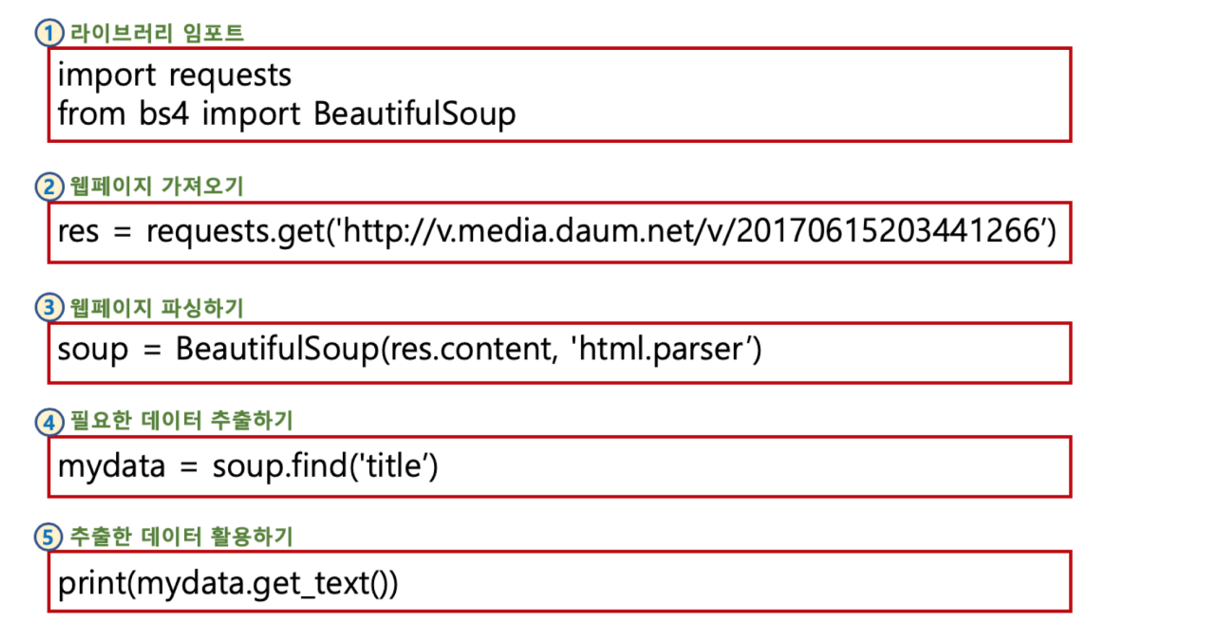

### 1.라이브러리 임포트
* request: 웹페이지 가져오기 라이브러리
* bs4(BeautifulSoup): 웹페이지 분석 라이브러리

In [1]:
import requests
from bs4 import BeautifulSoup

### 2. 웹페이지 가져오기
* URL 요청을 하고, HTML을 받는다. (웹 구조의 이해)
* requests.get()함수로 요청한다.
* res.content를 출력해본다. 
* 마우스오른쪽 + 페이지 소스보기

In [2]:
#'https://news.v.daum.net/v/20201230200156918'

res = requests.get('https://news.v.daum.net/v/20201230200156918')

In [5]:
#200이면 성공
res.status_code

200

In [11]:
res.content

b'<!doctype html>\n<html class="os_window"> \n <head data-cloud-area="head"> \n  <meta charset="utf-8"> \n  <meta http-equiv="X-UA-Compatible" content="IE=edge"> \n  <meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=no"> \n  <meta name="format-detection" content="telephone=no"> \n  <meta name="referrer" content="unsafe-url"> \n  <title>\xec\xa7\x81\xec\xa0\x91 \xec\x93\xb4 \'\xeb\xb0\x98\xec\x84\xb1\xeb\xac\xb8\' 19\xeb\xb6\x84\xea\xb0\x84 \xec\x9d\xbd\xec\x9c\xbc\xeb\xa9\xb0 \xeb\x88\x88\xeb\xac\xbc \xec\x8f\x9f\xec\x95\x84\xeb\x82\xb8 \xec\x9d\xb4\xec\x9e\xac\xec\x9a\xa9</title> \n  <link rel="shortcut icon" href="//t1.daumcdn.net/top/favicon/20241223/daum.ico"> \n  <meta property="mccp:docId" content="AEuvLpD6oe"> \n  <meta property="og:site_name" content="\xeb\x8b\xa4\xec\x9d\x8c - \xeb\x89\xb4\xec\x8a\xa41"> \n  <meta property="og:title" content="\xec\xa7\x81\xec\xa0\x91 \xec\x93\xb4 \'\xeb\xb0\x98\xec\x84\xb1\xeb\xac\xb8\' 19\xeb\xb6\

### 3. 웹페이지 파싱하기
* 파싱이란:문자열의 의미 분석
* soup = BeautifulSoup(HTML내용, 파서종류)
* soup에는 구조화된 데이터가 들어간다.

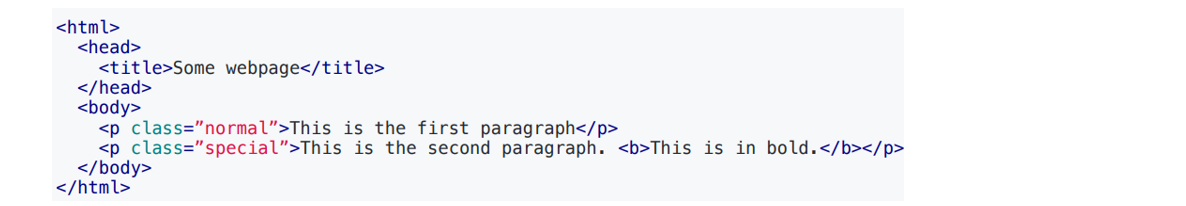


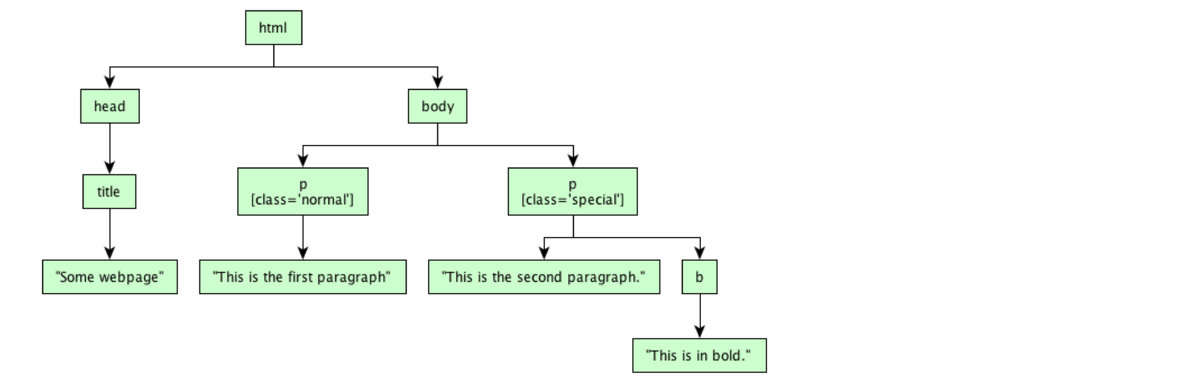

In [12]:
soup = BeautifulSoup(res.content,'html.parser')
soup

<!DOCTYPE html>

<html class="os_window">
<head data-cloud-area="head">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=no" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="unsafe-url" name="referrer"/>
<title>직접 쓴 '반성문' 19분간 읽으며 눈물 쏟아낸 이재용</title>
<link href="//t1.daumcdn.net/top/favicon/20241223/daum.ico" rel="shortcut icon"/>
<meta content="AEuvLpD6oe" property="mccp:docId"/>
<meta content="다음 - 뉴스1" property="og:site_name"/>
<meta content="직접 쓴 '반성문' 19분간 읽으며 눈물 쏟아낸 이재용" property="og:title"/>
<meta content="20201230200156" property="og:regDate"/>
<meta content="article" property="og:type"/>
<meta content="뉴스1" property="og:article:author"/>
<meta content="https://v.daum.net/v/20201230200156918" property="og:url"/>
<meta content="https://img1.daumcdn.net/thumb/S1200x630/?fname=https://t1.daumcdn.net/news/202012/30/NEWS1/202012302001563

### 4. 필요한 데이터 추출하기
* 이부분이 크롤링의 핵심!!!
* soup.select('태그명.css>태그명')로 추출하고자 하는 태그와 css이름을 조합해서 추출
* get_text()함수로 태그가 품고있는 텍스트를 가져옴

* 태그 살펴보는 방법
    * 마우스 오른쪽> 페이지소스보기
    * 크롬브라우저의 개발자모드
        * 윈도우) F12
        * 맥)Command + Alt + i

In [13]:

soup.select_one('title')

<title>직접 쓴 '반성문' 19분간 읽으며 눈물 쏟아낸 이재용</title>

In [14]:
soup.select('h3')

[<h3 class="tit_view" data-translation="true">직접 쓴 '반성문' 19분간 읽으며 눈물 쏟아낸 이재용</h3>,
 <h3 class="tit_box">이 시각 추천뉴스</h3>,
 <h3 class="tit_box">서비스 바로가기</h3>]

In [15]:
soup.select_one('h3.tit_view')

<h3 class="tit_view" data-translation="true">직접 쓴 '반성문' 19분간 읽으며 눈물 쏟아낸 이재용</h3>

In [17]:
#mArticle > div.head_view > h3
# //*[@id="mArticle"]/div[1]/h3
# /html/body/div[1]/main/section/div/article/div[1]/h3

soup.select('#mArticle > div.head_view > h3')

[<h3 class="tit_view" data-translation="true">직접 쓴 '반성문' 19분간 읽으며 눈물 쏟아낸 이재용</h3>]

### 추출한 데이터 활용하기

In [18]:
hdata = soup.select('#mArticle > div.head_view > h3')
hdata[0].get_text()

"직접 쓴 '반성문' 19분간 읽으며 눈물 쏟아낸 이재용"

### Remote Disconnected 에러발생
* 크롤링등 비정상적인 방법으로 사이트에 접근했을 시 서버에서 해당 호출을 막아버림.(네이버가 주로)
* headers = 유저 에이전트 기입
https://www.useragentstring.com/
* url = '접속하고픈사이트'
* res = requests.get(url, headers = headers) 로 

In [ ]:
# 만약 Remote Disconnected 에러가 발생하면 여기서 오류가 발생
url = 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=102&oid=025&aid=0003065817'
res = requests.get(url)

In [34]:
# user_agent 사용해서 
head = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}
url = 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=102&oid=025&aid=0003065817'
res = requests.get(url,headers = head)


In [35]:
res.status_code

200

## 크롤링 핵심 패턴 종합

* 패턴 코드 그대로 사용함.
* 패턴 2,4 번만 수정해서 사용함.


In [37]:
# 패턴1. 라이브러리 로드
import requests
from bs4 import BeautifulSoup

# 패턴2. 크롤링하고 싶은 페이지 URL넣음
res = requests.get('https://news.v.daum.net/v/20201230200156918')

# 패턴3. 데이터 구조화
soup = BeautifulSoup(res.content,'html.parser')

# 패턴4. 크롤링하고 싶은 내용 HTML 태그 지정
mydata = soup.select('#mArticle > div.head_view > h3')
mydata[0].get_text()

"직접 쓴 '반성문' 19분간 읽으며 눈물 쏟아낸 이재용"

### 다른 뉴스 타이틀을 크롤링 하세요

In [38]:
# 패턴1. 라이브러리 로드
import requests
from bs4 import BeautifulSoup

# 패턴2. 크롤링하고 싶은 페이지 URL넣음
res = requests.get('https://v.daum.net/v/20230502100510634')

# 패턴3. 데이터 구조화
soup = BeautifulSoup(res.content,'html.parser')

# 패턴4. 크롤링하고 싶은 내용 HTML 태그 지정
mydata = soup.select('#mArticle > div.head_view > h3')
mydata[0].get_text()

'IBM CEO "AI로 대체 가능 역할 7800개, 채용 중단"'

### 네이버 뉴스 타이틀을 크롤링 하세요.

In [40]:
# 패턴1. 라이브러리 로드
import requests
from bs4 import BeautifulSoup

# 패턴2. 크롤링하고 싶은 페이지 URL넣음
head = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}
url = 'https://n.news.naver.com/mnews/article/009/0005124421?sid=101'
res = requests.get(url,headers=head)

# 패턴3. 데이터 구조화
soup = BeautifulSoup(res.content,'html.parser')

# 패턴4. 크롤링하고 싶은 내용 HTML 태그 지정
mydata = soup.select('#title_area > span')
mydata[0].get_text()

'역시 현금이 최고네…10명중 6명 “어버이날 선물은 용돈”'

### 뉴스 이슈 리스트 가져오기

In [99]:
# 패턴1. 라이브러리 로드
import requests
from bs4 import BeautifulSoup

# 패턴2. 크롤링하고 싶은 페이지 URL넣음
res = requests.get('https://news.daum.net/')

# 패턴3. 데이터 구조화
soup = BeautifulSoup(res.content,'html.parser')

# 패턴4. 크롤링하고 싶은 내용 HTML 태그 지정
# css_selector = 'body > div.container-doc > main > section > div > div.content-article > div.box_g.box_news_issue > ul > li > div > div > strong > a'
# css_selector = 'a.link_txt'
# css_selector = 'div.box_g.box_news_issue > ul > li > div > div > strong > a'
# css_selector = 'div.box_g.box_news_issue > ul > li a'
css_selector = "#\\35 8d84141-b8dd-413c-9500-447b39ec29b9 > ul > li > a > div.cont_thumb > strong"
mydata = soup.select(css_selector)
for tag in mydata:
    print(tag.get_text().strip())

尹 석방 여부 언제 결정? 평균 1.3일 걸려 "이르면 오늘"
조사 대신 법정 택한 尹…공수처, 적부심 후 구속영장 고려(종합)
'구치소 두문불출' 윤 대통령…'진술 거부' 이어 '조사 불응' [스프]
박정훈 1심 무죄... 이젠 '윤석열의 외압'을 수사할 때
尹 측 "구금 및 의전 문제로 尹 불출석…그냥 잠자겠다는 것 아냐"
최 대행 "美 신정부와 협의채널 조기 구축…남북대화 열려 있어"(종합)
‘스몰딜’ 투자도 가능한 바이오펀드 신규 조성…“초기 바이오 벤처 지원”(종합)
尹 체포적부심 불출석…석동현 "영장 발부 법에 어긋나"
민주, '지지율 역전'에 "조기 대선 의식한 보수 결집…비중있게 보진 않아"(종합)


## 링크 가져오기(태그의 속성값)
```html
        <a href='www.naver.com'>네이버 홈페이지로 이동합니다. </p>
```

```python
tag = soup.select('a')
att = tag['href']

```

In [103]:
# 패턴1. 라이브러리 로드
import requests
from bs4 import BeautifulSoup

# 패턴2. 크롤링하고 싶은 페이지 URL넣음
res = requests.get('https://news.daum.net/')

# 패턴3. 데이터 구조화
soup = BeautifulSoup(res.content,'html.parser')

# 패턴4. 크롤링하고 싶은 내용 HTML 태그 지정
# css_selector = 'body > div.container-doc > main > section > div > div.content-article > div.box_g.box_news_issue > ul > li > div > div > strong > a'
# css_selector = 'a.link_txt'
# css_selector = 'div.box_g.box_news_issue > ul > li > div > div > strong > a'
# css_selector = 'div.box_g.box_news_issue > ul > li a'
css_selector = "#\\35 8d84141-b8dd-413c-9500-447b39ec29b9 > ul > li > a"
mydata = soup.select(css_selector)
for tag in mydata:
    print(tag['href'])

https://v.daum.net/v/20250116182349322
https://v.daum.net/v/20250116181945252
https://v.daum.net/v/20250116181801209
https://v.daum.net/v/20250116180503891
https://v.daum.net/v/20250116180354857
https://v.daum.net/v/20250116180334851
https://v.daum.net/v/20250116180120787
https://v.daum.net/v/20250116175748650
https://v.daum.net/v/20250116175056413


# 크롤링 팁

## 정규표현식

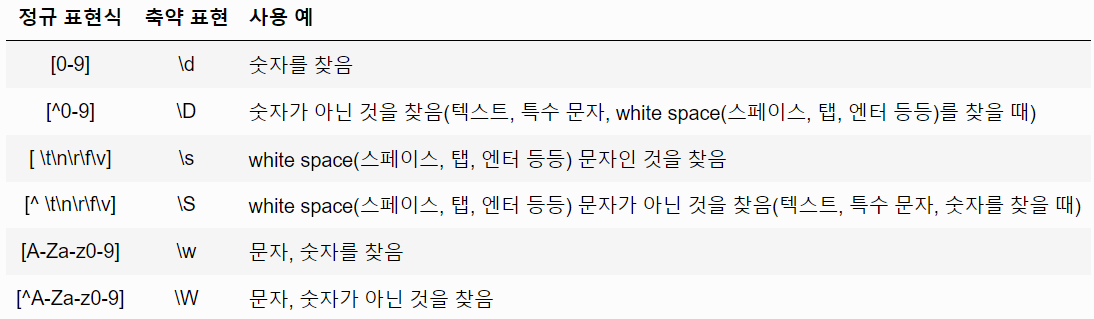



* [abc] 는 a, b, c 중 하나가 들어 있는 패턴을 말함

In [104]:
import re
#알파벳,숫자,한글 띄어쓰기 아니면 제거
text = "정말 우껴죽겠네 ㅋㅋㅋㅋ 존잼ㅠㅠ!@~~~"
re.sub('[^A-Za-z0-9가-힣 ]', '', text)

'정말 우껴죽겠네  존잼'

In [105]:
#한글, 공백 이외 제거
text = '韓子는 싫고, 한글은 nice하다. English 쵝오 -_-ㅋㅑㅋㅑ ./?!'
re.sub('[^가-힣 ]', '', text)

'는 싫고 한글은 하다  쵝오  '

In [107]:
#특수문자 제거
text = '010-1111#2222'
parse = re.sub('[-=.#/?:$}]', '', text)
parse

'01011112222'